In [1]:
import numpy as np
import pandas as pd
import prepare as prep
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import explore as ex

In [2]:
df=prep.explore_df()

In [3]:
df.head()

,id,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
0,TAAifFP590,Root,45.00,60.00,2018.0,2.0,4.0,60.0,90.0,10.0,412,4.059395,11,3.818182,3.636364,1,game,6
1,yqR4PtpO8X,Scythe,54.39,90.00,2016.0,1.0,5.0,90.0,120.0,14.0,763,4.213439,17,3.117647,3.235294,2,game,9
2,5H5JS0KLzK,Wingspan,50.00,60.00,2019.0,1.0,5.0,40.0,70.0,10.0,589,4.162919,12,2.500000,2.833333,3,game,11
3,RLlDWHh7hR,Gloomhaven,105.97,140.00,2017.0,1.0,4.0,60.0,150.0,12.0,491,4.351614,10,3.900000,3.600000,4,game,5
4,fDn9rQjH9O,Terraforming Mars,51.99,69.95,2016.0,1.0,5.0,90.0,120.0,12.0,713,4.146214,10,3.000000,3.300000,5,game,3


In [4]:
m=pd.read_csv('mechanic_df')

In [5]:
m.head()

,mechanics
0,Action / Movement Programming
1,Action Queue
2,Area Control
3,Dice Rolling
4,Engine Building


# first look at the mechanics to see which mechanics are most popular

In [6]:
m.value_counts().head(20)

mechanics                    
Hand Management                  375
Dice Rolling                     262
Variable Player Powers           257
Set Collection                   247
Card Drafting                    228
Cooperative Play                 145
Tile Placement                   143
Area Control                     124
Worker Placement                 123
Modular Board                    121
Grid Movement                     89
Deck Building                     87
Press Your Luck                   75
Network and Route Building        73
Area Majority/ Influence          72
Solo / Solitaire Game             71
Action Point Allowance System     69
Take That                         66
Area Movement                     66
Point to Point Movement           62
dtype: int64

Hand managment and dice rolling seem obvious to be the top two as they are necessary to play and progress a game. Cards are often a staple in games, so set collection and card drafting are also not suprising. However the drafting aspect is interesting. Many game have a random drawing mechanic compared to a draft mechanic to the cards.  

I suprises me that area control is rated so high but area movement and area majority/influence are much lower. Unless only one of these latter two are associated with area control games. Which if you combined all "area" based mechanics, it would be one of the highest mechanics.

In [7]:
df['rank'].value_counts().shape

(935,)

In [8]:
df.shape

(995, 18)

## top 100 games (~10%) will be considered 'high rated'

In [4]:
df['rank'].dtype

dtype('int64')

In [5]:
for i, r in df.iterrows():
    if r['rank'] <= 100:
        df.loc[i, 'rank'] = 1
    else:
        df.loc[i, 'rank'] = 0

In [6]:
df['rank'].value_counts()

0    892
1    103
Name: rank, dtype: int64

In [7]:
df.head(5)

,id,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
0,TAAifFP590,Root,45.00,60.00,2018.0,2.0,4.0,60.0,90.0,10.0,412,4.059395,11,3.818182,3.636364,1,game,6
1,yqR4PtpO8X,Scythe,54.39,90.00,2016.0,1.0,5.0,90.0,120.0,14.0,763,4.213439,17,3.117647,3.235294,1,game,9
2,5H5JS0KLzK,Wingspan,50.00,60.00,2019.0,1.0,5.0,40.0,70.0,10.0,589,4.162919,12,2.500000,2.833333,1,game,11
3,RLlDWHh7hR,Gloomhaven,105.97,140.00,2017.0,1.0,4.0,60.0,150.0,12.0,491,4.351614,10,3.900000,3.600000,1,game,5
4,fDn9rQjH9O,Terraforming Mars,51.99,69.95,2016.0,1.0,5.0,90.0,120.0,12.0,713,4.146214,10,3.000000,3.300000,1,game,3


In [8]:
df.tail(5)

,id,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
995,utvG6nvnq5,Snake Oil,19.99,19.95,2010.0,3.0,10.0,20.0,30.0,10.0,67,3.130597,0,0.0,0.0,0,game,0
996,2LJTEmU5LY,Bob Ross the Art of Chill,24.46,31.99,2017.0,2.0,4.0,30.0,30.0,12.0,64,3.370312,1,3.0,2.0,0,game,0
997,JBQPZrO0yC,A Study in Emerald,149.95,0.00,2013.0,2.0,5.0,90.0,90.0,13.0,30,3.433333,0,0.0,0.0,0,game,0
998,kz2pqBlpT4,Mansions of Madness,5.89,99.95,2011.0,2.0,5.0,120.0,180.0,13.0,68,3.252941,0,0.0,0.0,0,game,4
999,kgs5t2m5kv,Kokoro: Avenue of the Kodama,13.39,19.99,2017.0,2.0,8.0,30.0,45.0,14.0,58,3.312069,0,0.0,0.0,0,game,0


## Encode the 'type' column

In [9]:
df['type'].value_counts()

game         875
expansion    119
accessory      1
Name: type, dtype: int64

In [10]:
for i, t in df.iterrows():
    if t['type'] == 'game':
        df.loc[i, 'type'] = 0
    elif t['type'] == 'expansion':
        df.loc[i, 'type'] = 1
    else:
        df.loc[i, 'type'] = 2

In [11]:
df['type'].value_counts()

0    875
1    119
2      1
Name: type, dtype: int64

In [12]:
df.drop(columns=['id'], inplace=True)

## Split data

In [13]:
train, val, test= ex.tts(df, 'rank')

In [14]:
train.shape, val.shape, test.shape

((716, 17), (179, 17), (100, 17))

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 1:</h2>
    </header>
    <dl>
        <dt>Is the price of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average price of higher rated games and other games</dd>
        <dd>- $H_a$: The average price of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [20]:
alpha=.05

In [21]:
hirank=train[train['rank']==1]['price']

In [22]:
train[train['rank']==1]['price'].var()

1085.8798928421054

<AxesSubplot:xlabel='price', ylabel='Count'>

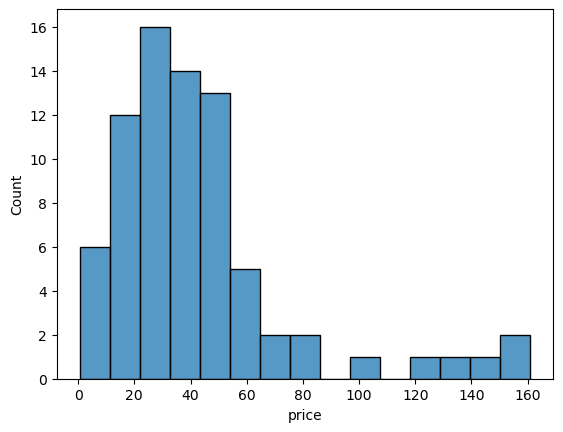

In [23]:
sns.histplot(hirank)

In [24]:
hirank.mean()

42.54710526315787

In [25]:
lowrank=train[train['rank']==0]['price']

In [26]:
train[train['rank']==0]['price'].var()

8125.636093228698

<AxesSubplot:xlabel='price', ylabel='Count'>

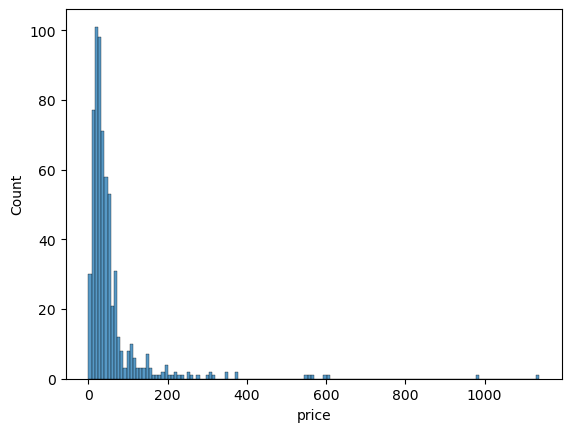

In [27]:
sns.histplot(lowrank)

In [28]:
lowrank.mean()

56.44161552500016

In [29]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=-2.674782496465062, pvalue=0.9960091240750775)

In [30]:
stats.ttest_ind(hirank, lowrank, alternative='less', equal_var=False)

Ttest_indResult(statistic=-2.674782496465062, pvalue=0.003990875924922544)

* pvalue indicates that high rated games have a significantlly lower price than other games
* this actually is the opposite result of the initial question
* mean price difference is ~14$

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 2:</h2>
    </header>
    <dl>
        <dt>Is the msrp of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average msrp of higher rated games and other games</dd>
        <dd>- $H_a$: The average msrp of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [31]:
hirank=train[train['rank']==1]['msrp']

In [32]:
hirank.var()

634.5115428070175

<AxesSubplot:xlabel='msrp', ylabel='Count'>

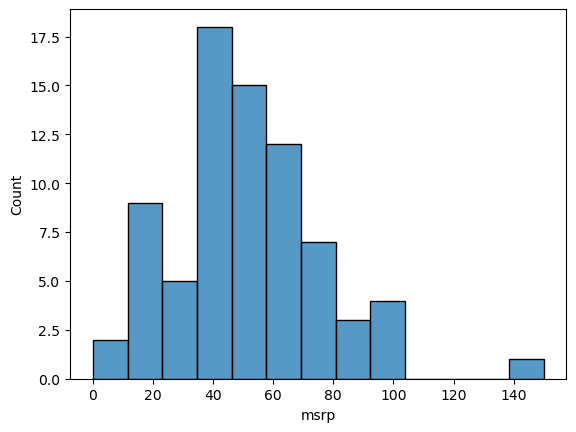

In [33]:
sns.histplot(hirank)

In [34]:
lowrank=train[train['rank']==0]['msrp']

In [35]:
lowrank.var()

1194.1851720647492

<AxesSubplot:xlabel='msrp', ylabel='Count'>

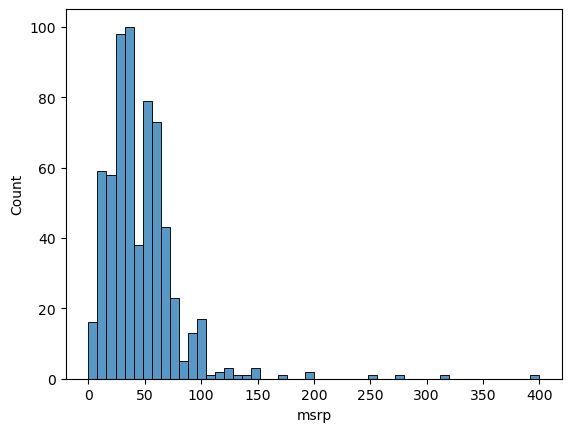

In [36]:
sns.histplot(lowrank)

In [37]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=1.3911842656628044, pvalue=0.0834682122710838)

* pvalue is not lower than the alpha
* overall msrp is not a good indicator of a top rated game

In [38]:
train.head()

,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
386,Bruges,45.456444,41.49,2013.0,2.0,4.0,60.0,75.0,10.0,139,3.498201,0,0.0,0.0,0,0,0
623,Atlantis Rising (second edition),48.000000,65.00,2022.0,1.0,4.0,45.0,90.0,10.0,34,3.959559,0,0.0,0.0,0,0,0
781,Bus,235.400000,89.99,1999.0,3.0,5.0,120.0,120.0,14.0,40,3.743750,0,0.0,0.0,0,0,1
105,Bohnanza,28.000000,19.95,1997.0,2.0,7.0,45.0,60.0,13.0,371,3.426649,2,2.0,2.5,0,0,4
808,Flip Ships,43.824000,40.00,2017.0,1.0,4.0,30.0,45.0,8.0,54,3.479847,0,0.0,0.0,0,0,0


<div class="alert alert-info">
    <header>
    <h2>Exploration Question 3:</h2>
    </header>
    <dl>
        <dt>Is the average user rating of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average user rating of higher rated games and other games</dd>
        <dd>- $H_a$: The average user rating of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [39]:
hirank=train[train['rank']==1]['average_user_rating']

In [40]:
hirank.var()

0.0631914901300298

<AxesSubplot:xlabel='average_user_rating', ylabel='Count'>

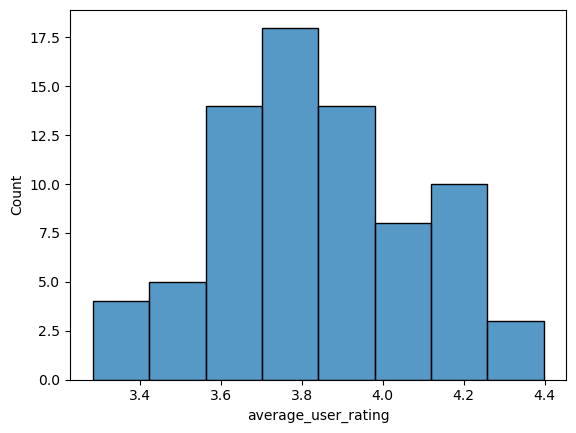

In [41]:
sns.histplot(hirank)

In [42]:
lowrank= train[train['rank']==0]['average_user_rating']

In [43]:
lowrank.var()

0.09776831335440073

<AxesSubplot:xlabel='average_user_rating', ylabel='Count'>

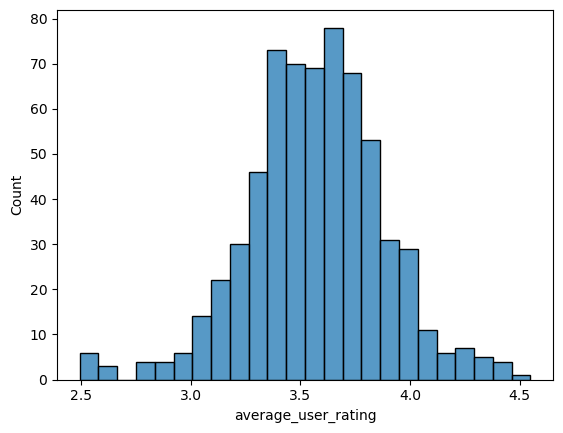

In [44]:
sns.histplot(lowrank)

In [45]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=8.37120932004523, pvalue=1.3589589718655607e-13)

In [46]:
hirank.mean(), lowrank.mean()

(3.829409758058103, 3.5667844994787146)

* the pvalue is lower than the alpha so we can reject the null hypothesis
* even though the pvalue indicates significance, the difference in the averages is only ~0.3 which is not very much
* this also can not be taken to modeling, because you won't know the average user rating until after the game is made. The model will aim to tell if a game will reach a high rank before it is released.

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 4:</h2>
    </header>
    <dl>
        <dt>Is the min_players of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average min_players of higher rated games and other games</dd>
        <dd>- $H_a$: The average min_players of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [47]:
hirank=train[train['rank']==1]['min_players']

In [48]:
hirank.var()

0.2856140350877192

<AxesSubplot:xlabel='min_players', ylabel='Count'>

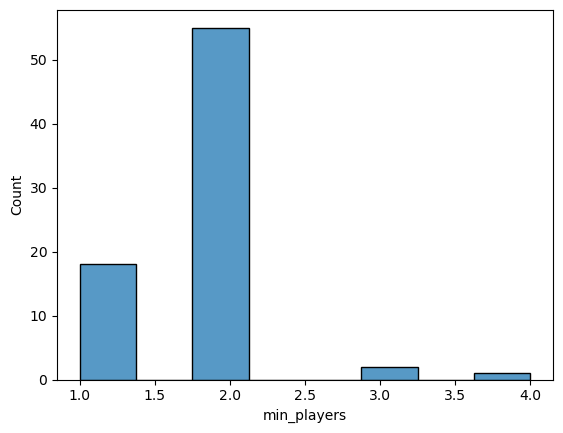

In [49]:
sns.histplot(hirank)

In [50]:
lowrank=train[train['rank']==0]['min_players']

In [51]:
lowrank.var()

0.53012275039124

<AxesSubplot:xlabel='min_players', ylabel='Count'>

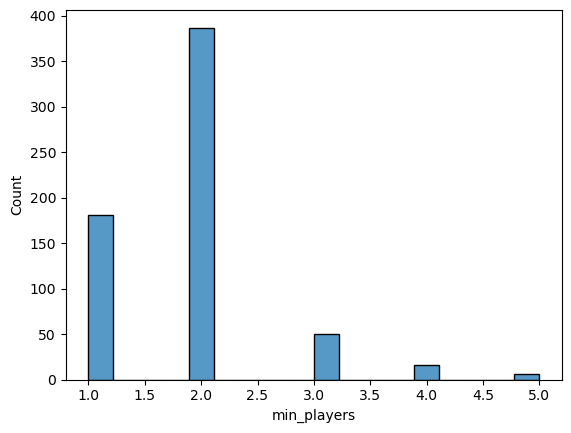

In [52]:
sns.histplot(lowrank)

In [53]:
stats.ttest_ind(hirank, lowrank, alternative='less', equal_var=False)

Ttest_indResult(statistic=-0.8512334048505296, pvalue=0.19823559163700116)

In [54]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=-0.8512334048505296, pvalue=0.8017644083629989)

* the pvalue is not lower than the alpha so we can not reject the null hypothesis
* min_players is not a significant driver of rank

In [55]:
train.head(5)

,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
386,Bruges,45.456444,41.49,2013.0,2.0,4.0,60.0,75.0,10.0,139,3.498201,0,0.0,0.0,0,0,0
623,Atlantis Rising (second edition),48.000000,65.00,2022.0,1.0,4.0,45.0,90.0,10.0,34,3.959559,0,0.0,0.0,0,0,0
781,Bus,235.400000,89.99,1999.0,3.0,5.0,120.0,120.0,14.0,40,3.743750,0,0.0,0.0,0,0,1
105,Bohnanza,28.000000,19.95,1997.0,2.0,7.0,45.0,60.0,13.0,371,3.426649,2,2.0,2.5,0,0,4
808,Flip Ships,43.824000,40.00,2017.0,1.0,4.0,30.0,45.0,8.0,54,3.479847,0,0.0,0.0,0,0,0


<div class="alert alert-info">
    <header>
    <h2>Exploration Question 5:</h2>
    </header>
    <dl>
        <dt>Is the max_players of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average max_players of higher rated games and other games</dd>
        <dd>- $H_a$: The average max_players of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [56]:
hirank=train[train['rank']==1]['max_players']

In [57]:
hirank.var()

121.9480701754385

<AxesSubplot:xlabel='max_players', ylabel='Count'>

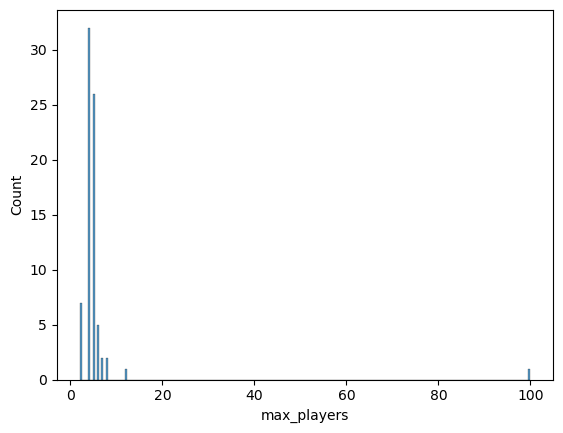

In [58]:
sns.histplot(hirank)

In [59]:
train[train['max_players']>50]

,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
406,Zombie Dice,8.99,13.13,2010.0,2.0,99.0,12.0,20.0,10.0,215,2.816412,0,0.00,0.000000,0,0,5
39,Welcome to...,19.49,29.95,2018.0,1.0,100.0,25.0,30.0,10.0,351,3.804822,6,2.00,2.666667,1,0,6
112,Cartographers: A Roll Player Tale,17.19,24.95,2019.0,1.0,100.0,30.0,45.0,10.0,190,4.034132,4,1.75,2.500000,0,0,8
642,SET,11.99,12.99,1988.0,1.0,99.0,30.0,30.0,6.0,134,2.962313,1,1.00,1.000000,0,0,0


In [60]:
lowrank=train[train['rank']==0]['max_players']

In [61]:
lowrank.var()

46.92272838419377

<AxesSubplot:xlabel='max_players', ylabel='Count'>

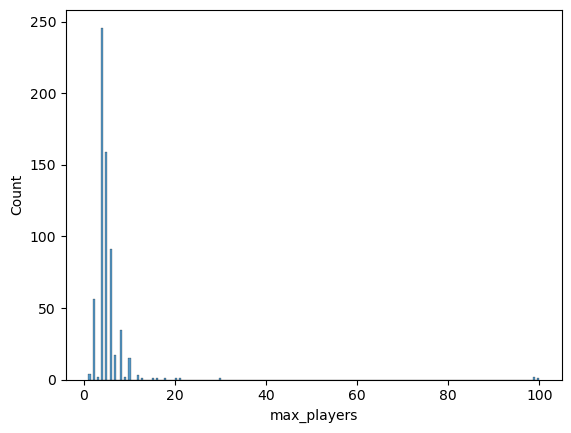

In [62]:
sns.histplot(lowrank)

In [63]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=0.3111490835683894, pvalue=0.378238503578918)

* the pvalue is not lower than the alpha so we can not reject the null hypothesis
* similar to min_players, max_players is not a significant driver of rank

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 6:</h2>
    </header>
    <dl>
        <dt>Is the min_playtime of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average min_playtime of higher rated games and other games</dd>
        <dd>- $H_a$: The average min_playtime of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [64]:
hirank=train[train['rank']==1]['min_playtime']

In [65]:
hirank.var()

1149.508771929825

<AxesSubplot:xlabel='min_playtime', ylabel='Count'>

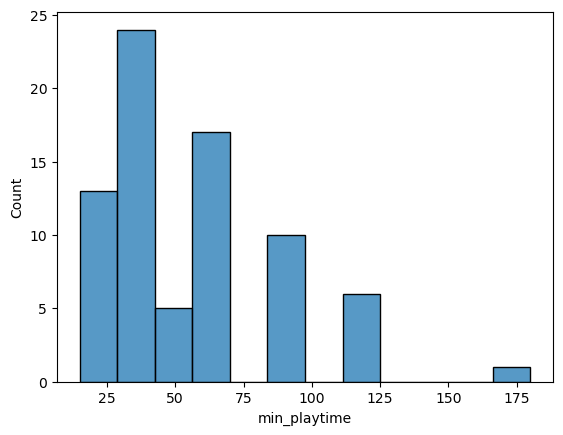

In [66]:
sns.histplot(hirank)

In [67]:
lowrank=train[train['rank']==0]['min_playtime']

In [68]:
lowrank.var()

1517.6717502934346

<AxesSubplot:xlabel='min_playtime', ylabel='Count'>

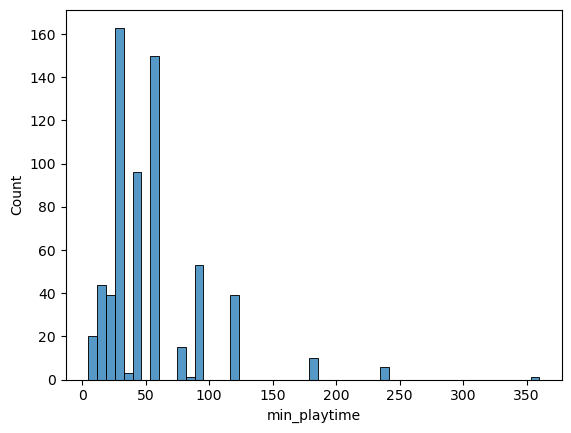

In [69]:
sns.histplot(lowrank)

In [70]:
stats.ttest_ind(hirank, lowrank, alternative='greater')

Ttest_indResult(statistic=-0.10326335477887541, pvalue=0.5411085224847587)

* the pvalue is not lower than the alpha so we can not reject the null hypothesis
* min_playtime is not a significant driver of rank

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 7:</h2>
    </header>
    <dl>
        <dt>Is the max_playtime of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average max_playtime of higher rated games and other games</dd>
        <dd>- $H_a$: The average max_playtime of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [71]:
hirank=train[train['rank']==1]['max_playtime']

In [72]:
hirank.var()

3011.982280701755

<AxesSubplot:xlabel='max_playtime', ylabel='Count'>

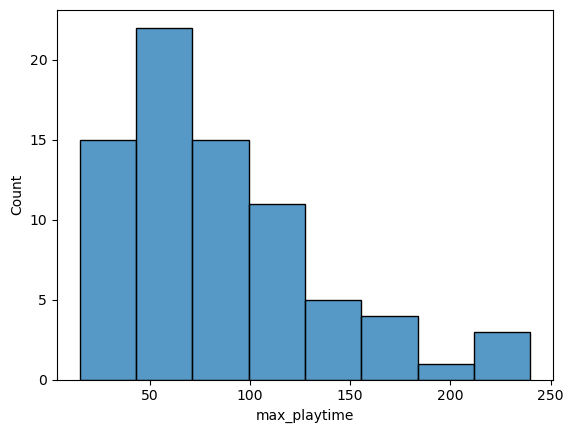

In [73]:
sns.histplot(hirank)

In [74]:
lowrank=train[train['rank']==0]['max_playtime']

In [75]:
lowrank.var()

4528.1552327855625

<AxesSubplot:xlabel='max_playtime', ylabel='Count'>

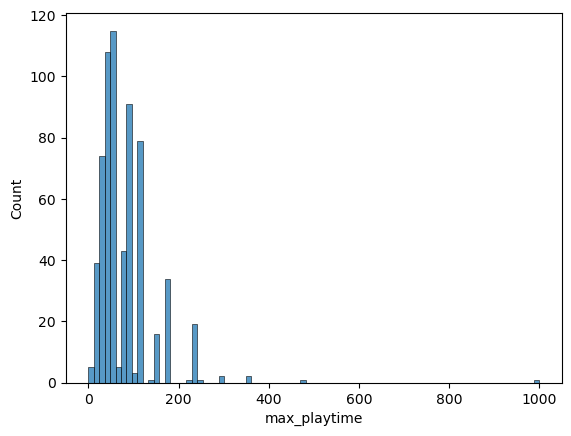

In [76]:
sns.histplot(lowrank)

In [77]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=0.7563281649461554, pvalue=0.22558295915180981)

* the pvalue is not lower than the alpha so we can not reject the null hypothesis
* max_playtime is not a significant driver of rank

In [78]:
train.head()

,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
386,Bruges,45.456444,41.49,2013.0,2.0,4.0,60.0,75.0,10.0,139,3.498201,0,0.0,0.0,0,0,0
623,Atlantis Rising (second edition),48.000000,65.00,2022.0,1.0,4.0,45.0,90.0,10.0,34,3.959559,0,0.0,0.0,0,0,0
781,Bus,235.400000,89.99,1999.0,3.0,5.0,120.0,120.0,14.0,40,3.743750,0,0.0,0.0,0,0,1
105,Bohnanza,28.000000,19.95,1997.0,2.0,7.0,45.0,60.0,13.0,371,3.426649,2,2.0,2.5,0,0,4
808,Flip Ships,43.824000,40.00,2017.0,1.0,4.0,30.0,45.0,8.0,54,3.479847,0,0.0,0.0,0,0,0


<div class="alert alert-info">
    <header>
    <h2>Exploration Question 8:</h2>
    </header>
    <dl>
        <dt>Is the min_age of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average min_age of higher rated games and other games</dd>
        <dd>- $H_a$: The average min_age of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [79]:
hirank=train[train['rank']==1]['min_age']

In [80]:
hirank.var()

4.822456140350878

<AxesSubplot:xlabel='min_age', ylabel='Count'>

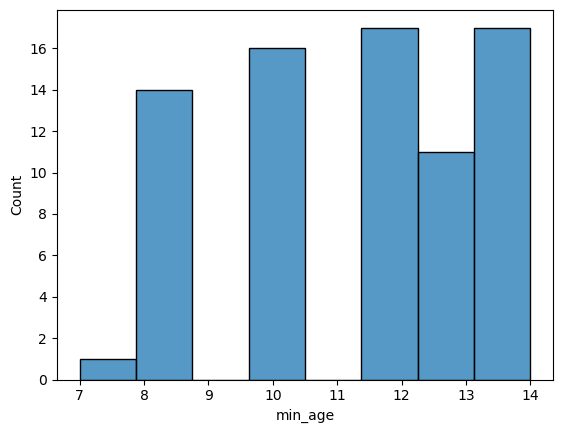

In [81]:
sns.histplot(hirank)

In [82]:
lowrank=train[train['rank']==0]['min_age']

In [83]:
lowrank.var()

5.690823063380294

<AxesSubplot:xlabel='min_age', ylabel='Count'>

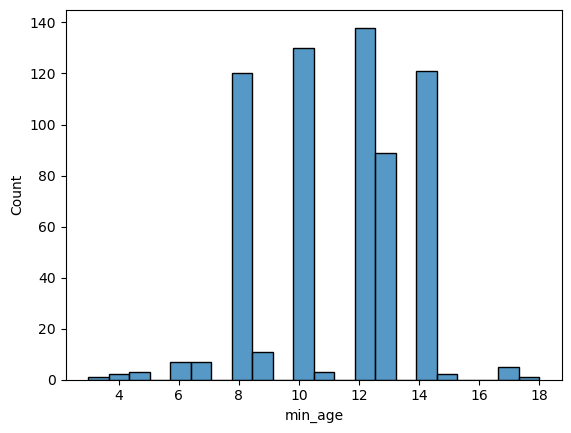

In [84]:
sns.histplot(lowrank)

In [85]:
stats.ttest_ind(hirank, lowrank, alternative='greater')

Ttest_indResult(statistic=0.6900247722549727, pvalue=0.24520141265934886)

* the pvalue is not lower than the alpha so we can not reject the null hypothesis
* min_age is not a significant driver of rank

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 9:</h2>
    </header>
    <dl>
        <dt>Is the num_distributors of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average num_distributors of higher rated games and other games</dd>
        <dd>- $H_a$: The average num_distributors of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [86]:
hirank=train[train['rank']==1]['num_distributors']

In [87]:
hirank.var()

6.426666666666667

<AxesSubplot:xlabel='num_distributors', ylabel='Count'>

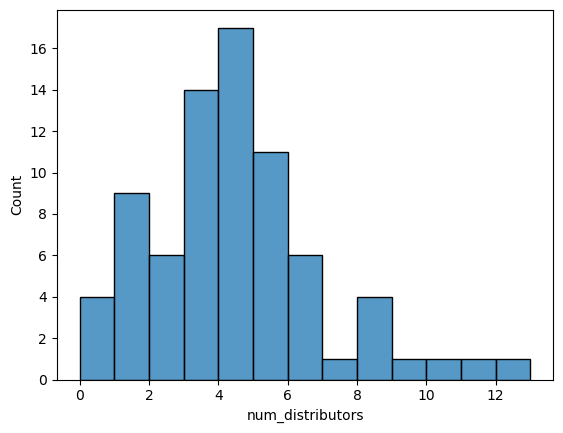

In [88]:
sns.histplot(hirank)

In [89]:
lowrank=train[train['rank']==0]['num_distributors']

In [90]:
lowrank.var()

4.561023082942098

<AxesSubplot:xlabel='num_distributors', ylabel='Count'>

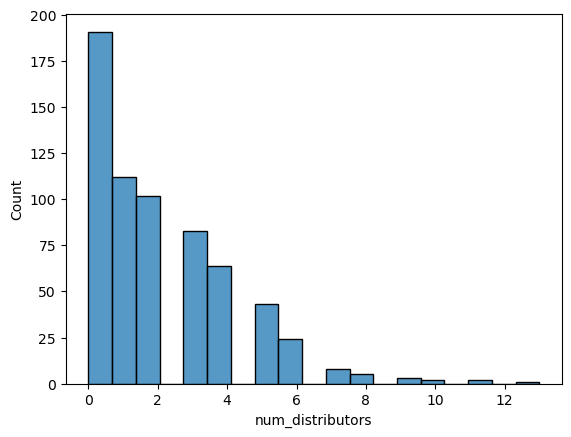

In [91]:
sns.histplot(lowrank)

In [92]:
stats.ttest_ind(hirank, lowrank, alternative='greater')

Ttest_indResult(statistic=7.0973865909179885, pvalue=1.5364921060137039e-12)

* the pvalue is lower than the alpha so we reject the null hypothesis
* number of distributors is a driver of rank.

In [ ]:
def q9_statistic(train):
    alpha=.05
    hirank=train[train['rank']==1]['num_distributors']
    lowrank=train[train['rank']==0]['num_distributors']
    t, p= stats.ttest_ind(hirank, lowrank, alternative='greater')
    if p< alpha:
        print(f'The p-value ({p}) is lower than the alpha ({alpha}) so we reject the null hypothesis.')
    else:
        print('We do not reject the null hypothesis.')

In [27]:
def q1_plots(train):
    '''
    This function plots the necessary plots to visualize explore question 9
    '''
    high=train[train['rank']==1]
    low=train[train['rank']==0]
    plt.figure(figsize=(10,5))
    plt.subplot(221)
    sns.histplot(x='num_distributors', data=high)
    plt.title('High Rated Games')
    plt.xlabel('Number of Distributors')
    plt.ylabel('Number of Games')
    plt.grid(True, alpha=0.3, linestyle='--', axis='y')

    plt.subplot(222)
    sns.histplot(x='num_distributors', data=low)
    plt.title('Low Rated Games')
    plt.xlabel('Number of Distributors')
    plt.ylabel('Number of Games')
    plt.grid(True, alpha=0.3, linestyle='--', axis='y')
    
    plt.figure(figsize=(25,10))
    plt.subplot(223)
    plt.title('All Games')
    sns.histplot(x='num_distributors', data=high, alpha=.7, color='green', label= 'High Rated')
    sns.histplot(x='num_distributors', data=low, alpha=.5, label='Low Rated')
    plt.xlabel('Number of Distributors')
    plt.ylabel('Number of Games')
    plt.axvline(x=(high['num_distributors'].mean()), color='red', label='High Rated Games Mean')
    plt.axvline(x=(low['num_distributors'].mean()), color='yellow', label='Low Rated Games Mean')
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='--', axis='y')
    plt.subplots_adjust(left=0.1,
                            bottom=-0.1,
                            right=0.9,
                            top=0.9,
                            wspace=0.4,
                            hspace=0.4)
    plt.show()

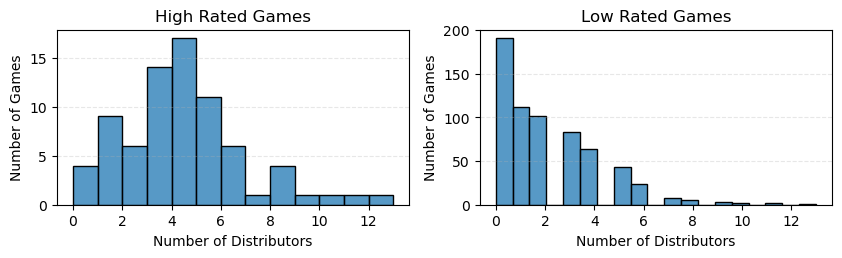

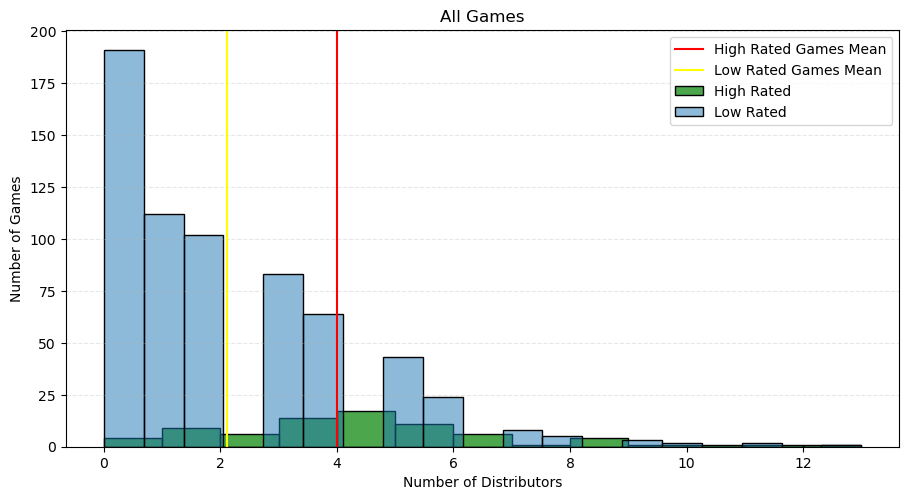

In [28]:
q1_plots(train)

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 10:</h2>
    </header>
    <dl>
        <dt>Is the year_published of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average year_published of higher rated games and other games</dd>
        <dd>- $H_a$: The average year_published of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [93]:
hirank=train[train['rank']==1]['year_published']

In [94]:
hirank.var()

24.000526315789497

<AxesSubplot:xlabel='year_published', ylabel='Count'>

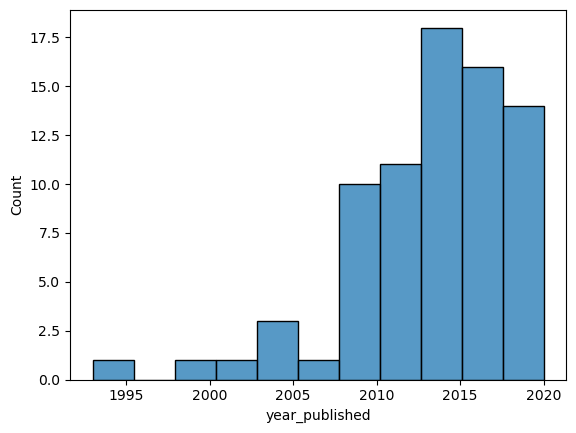

In [95]:
sns.histplot(hirank)

In [96]:
lowrank=train[train['rank']==0]['year_published']

In [97]:
lowrank.var()

1638.9000000000026

<AxesSubplot:xlabel='year_published', ylabel='Count'>

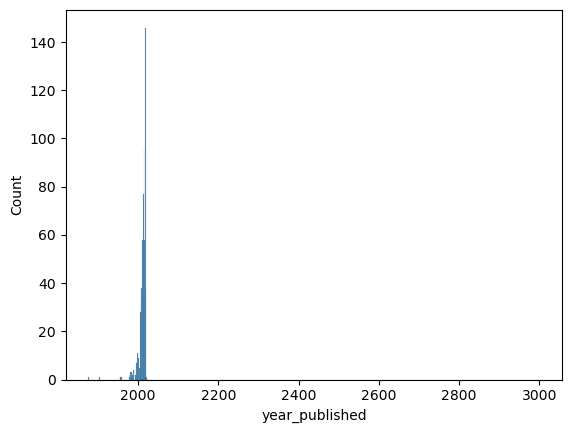

In [98]:
sns.histplot(lowrank)

In [99]:
train[train['year_published']>2022]

,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
616,Backgammon,5.29,5.99,3000.0,2.0,2.0,30.0,30.0,8.0,124,3.077471,3,2.0,2.666667,0,0,1


In [100]:
for i, row in df.iterrows():
    if row['year_published']==3000:
        df.loc[i, 'year_published'] = (-3000)

In [101]:
train, val, test= ex.tts(df, 'rank')

In [102]:
train[train['year_published']<0]

,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
616,Backgammon,5.29,5.99,-3000.0,2.0,2.0,30.0,30.0,8.0,124,3.077471,3,2.0,2.666667,0,0,1


In [103]:
lowrank=train[train['rank']==0]['year_published']

In [104]:
lowrank.var()

39349.69812206579

<AxesSubplot:xlabel='year_published', ylabel='Count'>

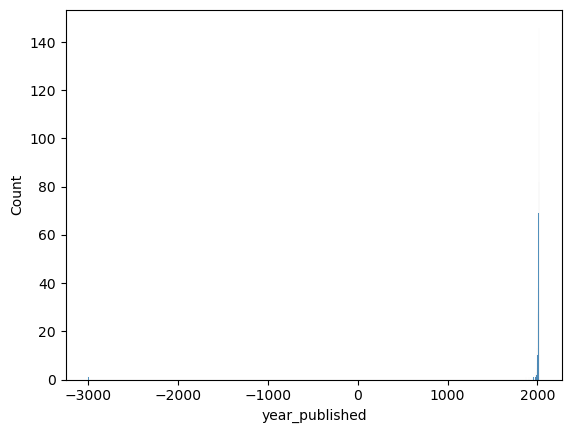

In [105]:
sns.histplot(lowrank)

In [106]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=1.2580818214418588, pvalue=0.10440855006423679)

* year_published is not an indicator of if a game is higher rated or not

In [107]:
train[train['rank']==1]

,name,price,msrp,year_published,min_players,max_players,min_playtime,max_playtime,min_age,num_user_ratings,average_user_rating,num_user_complexity_votes,average_learning_complexity,average_strategy_complexity,rank,type,num_distributors
35,Five Tribes,47.49,60.00,2014.0,2.0,4.0,60.0,90.0,13.0,435,3.827832,2,3.000000,3.500000,1,0,4
54,Sushi Go Party!,14.99,22.00,2016.0,2.0,8.0,30.0,45.0,8.0,427,3.578785,6,2.166667,2.333333,1,0,3
11,Codenames,12.81,19.95,2015.0,2.0,8.0,15.0,15.0,10.0,890,3.664894,10,1.100000,2.200000,1,0,10
67,Takenoko,39.06,49.99,2011.0,2.0,4.0,45.0,60.0,13.0,436,3.473755,2,2.500000,2.000000,1,0,3
32,Clank! A Deck-Building Adventure,44.79,60.00,2012.0,2.0,4.0,30.0,60.0,13.0,444,3.799500,3,2.333333,2.000000,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Star Wars Imperial Assault,11.99,99.95,2014.0,2.0,5.0,90.0,240.0,13.0,244,3.796952,1,3.000000,2.000000,1,0,5
66,Gaia Project,75.99,99.95,2017.0,1.0,4.0,60.0,150.0,14.0,189,4.152593,3,4.000000,4.333333,1,0,3
56,Raiders of the North Sea,43.50,55.00,2015.0,2.0,4.0,60.0,120.0,12.0,295,3.915957,2,3.000000,3.000000,1,0,3
79,Paladins of the West Kingdom,36.52,55.00,2019.0,1.0,4.0,90.0,120.0,12.0,138,4.166286,5,4.000000,3.800000,1,0,3


<div class="alert alert-info">
    <header>
    <h2>Exploration Summary</h2>
    </header>
    <dl>
        <dt>No features were found to be significant of higher rated games other than number of distributors. This is interesting, because that means that regardless of the features of a board game they all have a chance to do well and be higher rated. There were a number of more popular mechanics for board games which can be used to increase the liklihood of a game being higher rated.</dt>
    </dl>
</div>

In [108]:
top=pd.read_csv('top_100_mechanics.csv')

In [109]:
top.shape

(582, 1)

In [110]:
lower=pd.read_csv('over_100_mechanics.csv')

In [111]:
lower.shape

(3673, 1)

In [112]:
pd.DataFrame(top.value_counts()).head(20)

,0
mechanics,
Hand Management,47
Set Collection,36
Drafting,24
Variable Player Powers,24
Dice Rolling,22
Worker Placement,20
Cooperative Play,19
Card Drafting,18
Solo / Solitaire Game,17


In [113]:
pd.DataFrame(lower.value_counts()).head(20)

,0
mechanics,
Hand Management,324
Dice Rolling,242
Variable Player Powers,233
Set Collection,211
Card Drafting,204
Tile Placement,129
Cooperative Play,125
Worker Placement,110
Modular Board,110


## These are the top 20 mechanics for the top 100 and >100 games.
Most of the mechanics are the same even if they are in slightly different order. However, high rated games have 'end game bonuses', 'drafting', 'engine building', 'Simultaneous play', 'contracts', and 'point to point movement' and lower rated games have 'area majority/influence', 'action point allowance system', 'press your luck', 'area movement', 'take that', and 'auction'  

In an attempt to summarize this difference into words:  
Higher rated games seem to favor and reward more skill based play instead of relying on luck and hindering other players. Higher rated games also seem to stay away from area movement and other area based playstyles like majority/influence; they prefer point to point and grid movement even though grid movement is shared between the two groups. These are the most notable differences with other minor differences.

# Use NLP to explore descriptions

In [114]:
df=pd.read_csv('descriptions.csv')

In [115]:
df.head()

,name,description_preview,rank
0,Root,Find adventure in this marvelous asymmetric g...,1
1,Scythe,Scythe gives players almost complete contro...,2
2,Wingspan,"Wingspan is a competitive, medium-weight,...",3
3,Gloomhaven,Gloomhaven is a game of Euro-inspired tacti...,4
4,Terraforming Mars,"In the 2400s, mankind begins to terraform the...",5


In [116]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import unicodedata
import re

In [117]:
des = df['description_preview']

In [118]:
des.head()

0     Find adventure in this marvelous asymmetric g...
1      Scythe  gives players almost complete contro...
2       Wingspan   is a competitive, medium-weight,...
3      Gloomhaven  is a game of Euro-inspired tacti...
4     In the 2400s, mankind begins to terraform the...
Name: description_preview, dtype: object

In [119]:
for d in range(0, 978):
    des[d]=des[d].lower()

/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_9872/29304116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des[d]=des[d].lower()


In [120]:
des.head()

0     find adventure in this marvelous asymmetric g...
1      scythe  gives players almost complete contro...
2       wingspan   is a competitive, medium-weight,...
3      gloomhaven  is a game of euro-inspired tacti...
4     in the 2400s, mankind begins to terraform the...
Name: description_preview, dtype: object

In [121]:
for d in range(0,978):
    des[d] = unicodedata.normalize('NFKD', des[d]).encode('ascii', 'ignore').decode('utf-8', 'ignore')

/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_9872/1262549740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des[d] = unicodedata.normalize('NFKD', des[d]).encode('ascii', 'ignore').decode('utf-8', 'ignore')


In [122]:
des.head()

0     find adventure in this marvelous asymmetric g...
1      scythe  gives players almost complete contro...
2       wingspan   is a competitive, medium-weight,...
3      gloomhaven  is a game of euro-inspired tacti...
4     in the 2400s, mankind begins to terraform the...
Name: description_preview, dtype: object

In [123]:
# You can remove the comment marks from this cell to take out hyphin characters too. This would change overall results.
#for d in range(0,978):
#    des[d]=des[d].replace('-',' ')

In [124]:
des.head()

0     find adventure in this marvelous asymmetric g...
1      scythe  gives players almost complete contro...
2       wingspan   is a competitive, medium-weight,...
3      gloomhaven  is a game of euro-inspired tacti...
4     in the 2400s, mankind begins to terraform the...
Name: description_preview, dtype: object

In [125]:
for d in range(0,978):
    des[d] = re.sub(r"[^a-z0-9'\s-]", '', des[d])

/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_9872/1017877938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des[d] = re.sub(r"[^a-z0-9'\s-]", '', des[d])


In [126]:
des.head()

0     find adventure in this marvelous asymmetric g...
1      scythe  gives players almost complete contro...
2       wingspan   is a competitive medium-weight c...
3      gloomhaven  is a game of euro-inspired tacti...
4     in the 2400s mankind begins to terraform the ...
Name: description_preview, dtype: object

In [127]:
tokenizer = nltk.tokenize.ToktokTokenizer()

for d in range(0,978):
    des[d]=tokenizer.tokenize(des[d], return_str=True)

/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_9872/717906340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des[d]=tokenizer.tokenize(des[d], return_str=True)


In [128]:
des.head()

0    find adventure in this marvelous asymmetric ga...
1    scythe gives players almost complete control o...
2    wingspan is a competitive medium-weight card-d...
3    gloomhaven is a game of euro-inspired tactical...
4    in the 2400s mankind begins to terraform the p...
Name: description_preview, dtype: object

In [129]:
des[0]

'find adventure in this marvelous asymmetric game root provides limitless replay value as you and your friends explore the unique factions all wanting to rule a fantastic forest kingdom play as the marquise de cat and dominate the woods extracting its riches and policing its inhabitants as the woodland alliance gathering supporters and coordinate revolts against the ruling regime the eyrie dynasties regaining control of the woods while keeping your squabbling court at bay or as the vagabond seeking fame and fortune as you forge alliances and rivalries with the other players each faction has its own play style and paths to victory providing an immersive game experience you will want to play again and again'

In [130]:
ps = nltk.porter.PorterStemmer()
for d in range(0,978):
    stems=[ps.stem(word) for word in des[d].split()]
    des[d] = ' '.join(stems)

/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_9872/545454939.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des[d] = ' '.join(stems)


In [131]:
des[0]

'find adventur in thi marvel asymmetr game root provid limitless replay valu as you and your friend explor the uniqu faction all want to rule a fantast forest kingdom play as the marquis de cat and domin the wood extract it rich and polic it inhabit as the woodland allianc gather support and coordin revolt against the rule regim the eyri dynasti regain control of the wood while keep your squabbl court at bay or as the vagabond seek fame and fortun as you forg allianc and rivalri with the other player each faction ha it own play style and path to victori provid an immers game experi you will want to play again and again'

In [132]:
stopword_list = stopwords.words('english')
for d in range(0,978):
    words = des[d].split()
    filtered_words = [w for w in words if w not in stopword_list]

    des[d] = ' '.join(filtered_words)

/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_9872/3281821909.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des[d] = ' '.join(filtered_words)


In [133]:
des[0]

'find adventur thi marvel asymmetr game root provid limitless replay valu friend explor uniqu faction want rule fantast forest kingdom play marquis de cat domin wood extract rich polic inhabit woodland allianc gather support coordin revolt rule regim eyri dynasti regain control wood keep squabbl court bay vagabond seek fame fortun forg allianc rivalri player faction ha play style path victori provid immers game experi want play'

In [134]:
df.head()

,name,description_preview,rank
0,Root,find adventur thi marvel asymmetr game root pr...,1
1,Scythe,scyth give player almost complet control fate ...,2
2,Wingspan,wingspan competit medium-weight card-driven en...,3
3,Gloomhaven,gloomhaven game euro-inspir tactic combat pers...,4
4,Terraforming Mars,2400 mankind begin terraform planet mar giant ...,5


In [135]:
for i, r in df.iterrows():
    if r['rank'] <= 100:
        df.loc[i, 'rank'] = 1
    else:
        df.loc[i, 'rank'] = 0

In [136]:
df.head()

,name,description_preview,rank
0,Root,find adventur thi marvel asymmetr game root pr...,1
1,Scythe,scyth give player almost complet control fate ...,1
2,Wingspan,wingspan competit medium-weight card-driven en...,1
3,Gloomhaven,gloomhaven game euro-inspir tactic combat pers...,1
4,Terraforming Mars,2400 mankind begin terraform planet mar giant ...,1


In [137]:
df.tail()

,name,description_preview,rank
973,Omen: A Reign of War,could greatest warlord isl ever seen thirst po...,0
974,Snake Oil,old west wili snake oil salesman special talen...,0
975,Bob Ross the Art of Chill,earn chill point paint landscap featur like ha...,0
976,Mansions of Madness,horrif monster spectral presenc lurk manor cry...,0
977,Kokoro: Avenue of the Kodama,enchant forest kodama flourish much growth anc...,0


In [138]:
high=df[df['rank']==1]

In [139]:
des=high['description_preview']

In [140]:
one=des[0]
two=des[1]

In [141]:
one

'find adventur thi marvel asymmetr game root provid limitless replay valu friend explor uniqu faction want rule fantast forest kingdom play marquis de cat domin wood extract rich polic inhabit woodland allianc gather support coordin revolt rule regim eyri dynasti regain control wood keep squabbl court bay vagabond seek fame fortun forg allianc rivalri player faction ha play style path victori provid immers game experi want play'

In [142]:
two

"scyth give player almost complet control fate player ' individu hidden object card onli element luck variabl encount card player draw interact citizen newli explor land encount card provid player sever option allow mitig luck draw select combat also driven choic luck random scyth use streamlin action-select mechan round phase keep gameplay move brisk pace reduc downtim turn plenti direct conflict player seek player elimin everi part scyth ha aspect engine-build player upgrad action becom effici build structur improv posit map enlist new recruit enhanc charact abil activ mech deter oppon invad expand border reap greater type quantiti resourc engine-build aspect creat sens momentum progress throughout game order player improv engin add uniqu feel game even play one faction multipl time"

In [143]:
test= ' '.join([one, two])

In [144]:
test

"find adventur thi marvel asymmetr game root provid limitless replay valu friend explor uniqu faction want rule fantast forest kingdom play marquis de cat domin wood extract rich polic inhabit woodland allianc gather support coordin revolt rule regim eyri dynasti regain control wood keep squabbl court bay vagabond seek fame fortun forg allianc rivalri player faction ha play style path victori provid immers game experi want play scyth give player almost complet control fate player ' individu hidden object card onli element luck variabl encount card player draw interact citizen newli explor land encount card provid player sever option allow mitig luck draw select combat also driven choic luck random scyth use streamlin action-select mechan round phase keep gameplay move brisk pace reduc downtim turn plenti direct conflict player seek player elimin everi part scyth ha aspect engine-build player upgrad action becom effici build structur improv posit map enlist new recruit enhanc charact ab

In [145]:
high_des=[]
for d in range(0,103):
    high_des.append(des[d])

In [146]:
high_des=",".join(high_des)

In [147]:
high_des=high_des.replace(',', ' ')

In [148]:
high_des[0:500]

"find adventur thi marvel asymmetr game root provid limitless replay valu friend explor uniqu faction want rule fantast forest kingdom play marquis de cat domin wood extract rich polic inhabit woodland allianc gather support coordin revolt rule regim eyri dynasti regain control wood keep squabbl court bay vagabond seek fame fortun forg allianc rivalri player faction ha play style path victori provid immers game experi want play scyth give player almost complet control fate player ' individu hidde"

In [149]:
df.shape

(978, 3)

In [150]:
df[df['rank']==1].shape, df[df['rank']==0].shape

((103, 3), (875, 3))

In [151]:
low=df[df['rank']==0]['description_preview']

In [152]:
low.head()

103    corpor incorpor interplanetari construct firm ...
104    grand voyag year 1275 marco polo ha final reac...
105    thi great card game plant trade sell bean - 11...
106    one cooper parti game play togeth discov mani ...
107    new power plant set 1 recharg offer new challe...
Name: description_preview, dtype: object

In [153]:
low.shape

(875,)

In [154]:
low[103]

"corpor incorpor interplanetari construct firm build sewer system low-incom hous less-develop planet galaxi year corp inc ha totter brink bankruptci transport build materi edg galaxi need servic greatest riski busi compani wa save visionari board director instead ship materi peripheri reason whi build materi spacecraft let ship themselv furthermor whi hire pilot nut-cas free ' come sign contract gain unrestrict access corp inc warehous build space ship avail prefabr compon fli peripheri cours may eat loss ani profit make along way keep corpor incorpor pay bonu quick deliveri ' possibl end insurmount debt finish day panhandl street deneb iii ladi luck smile upon might find among 10 billion richest peopl galaxi"

In [155]:
low_des=[]
for d in range(103,876):
    low_des.append(low[d])
low_des=",".join(low_des)
low_des=low_des.replace(',', ' ')

In [156]:
low_des[0:500]

"corpor incorpor interplanetari construct firm build sewer system low-incom hous less-develop planet galaxi year corp inc ha totter brink bankruptci transport build materi edg galaxi need servic greatest riski busi compani wa save visionari board director instead ship materi peripheri reason whi build materi spacecraft let ship themselv furthermor whi hire pilot nut-cas free ' come sign contract gain unrestrict access corp inc warehous build space ship avail prefabr compon fli peripheri cours may"

In [157]:
low_des=low_des.replace('\'', '')

In [158]:
low_des=low_des.replace('  ', ' ')

In [159]:
low_des[0:600]

'corpor incorpor interplanetari construct firm build sewer system low-incom hous less-develop planet galaxi year corp inc ha totter brink bankruptci transport build materi edg galaxi need servic greatest riski busi compani wa save visionari board director instead ship materi peripheri reason whi build materi spacecraft let ship themselv furthermor whi hire pilot nut-cas free come sign contract gain unrestrict access corp inc warehous build space ship avail prefabr compon fli peripheri cours may eat loss ani profit make along way keep corpor incorpor pay bonu quick deliveri possibl end insurmoun'

In [160]:
high_des=high_des.replace('\'', '')

In [161]:
high_des=high_des.replace('  ', ' ')

## Bigrams and trigrams of high rated games

In [162]:
top_20_high_bigrams = (pd.Series(nltk.ngrams(high_des.split(), 2))
                      .value_counts()
                      .head(20))

top_20_high_bigrams.head()

(victori, point)    21
(game, player)      18
(win, game)         14
(player, take)      13
(card, player)      11
dtype: int64

In [163]:
top_20_high_trigrams = (pd.Series(nltk.ngrams(high_des.split(), 3))
                      .value_counts()
                      .head(20))

top_20_high_trigrams.head()

(player, take, role)    7
(point, end, game)      5
(betray, hous, hill)    5
(spiel, de, jahr)       4
(year, 2004, -)         4
dtype: int64

## Bigrams and trigrams of non-high rated games

In [164]:
top_20_low_bigrams = (pd.Series(nltk.ngrams(low_des.split(), 2))
                      .value_counts()
                      .head(20))

top_20_low_bigrams.head()

(player, take)      114
(game, player)      101
(board, game)        90
(victori, point)     81
(card, game)         76
dtype: int64

In [165]:
top_20_low_trigrams = (pd.Series(nltk.ngrams(low_des.split(), 3))
                      .value_counts()
                      .head(20))

top_20_low_trigrams.head()

(player, take, role)    46
(player, take, turn)    22
(&#9;, &#9;, &#9;)      16
(two, four, player)     15
(point, end, game)      13
dtype: int64

In [166]:
import re

In [167]:
low_des=[]
for d in range(103,876):
    low_des.append(low[d])

In [168]:
for d in low_des:
    if re.search('&#9;', d):
        print(d)
    else:
        continue


&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; cockroach poker revers set collect game ha noth poker except game bluf card show cockroach rat stink bug instead queen 10 ace goal game forc anoth player collect 4 ani one type critter deck includ 64 card eight copi eight type critter set game shuffl deck deal card player turn player take one card hi hand lay face tabl slide player hi choic declar type critter eg stink bug player receiv card either accept card say either true fals reveal card thi player wrong claim keep card tabl front face right player gave card place face befor peek card pass face anoth player either say origin type critter say new type thi new player ha choic accept card pass unless card ha alreadi seen player case player must take first option game end player ha card pass hi turn player ha four card critter tabl front either case thi player lose everyon els win &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9;


In [169]:
df[df['name']=='Cockroach Poker']

,name,description_preview,rank
352,Cockroach Poker,&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &...,0


In [170]:
low_des.index('&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; '
                'cockroach poker revers set collect game ha noth poker except game bluf card show '
                'cockroach rat stink bug instead queen 10 ace goal game forc anoth player collect 4 ani '
                'one type critter deck includ 64 card eight copi eight type critter set game shuffl deck '
                'deal card player turn player take one card hi hand lay face tabl slide player hi choic '
                'declar type critter eg stink bug player receiv card either accept card say either true fals '
                'reveal card thi player wrong claim keep card tabl front face right player gave card place '
                'face befor peek card pass face anoth player either say origin type critter say new type thi '
                'new player ha choic accept card pass unless card ha alreadi seen player case player must take '
                'first option game end player ha card pass hi turn player ha four card critter tabl front either '
                'case thi player lose everyon els win &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9;')

249

In [171]:
low_des[249]

'&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; cockroach poker revers set collect game ha noth poker except game bluf card show cockroach rat stink bug instead queen 10 ace goal game forc anoth player collect 4 ani one type critter deck includ 64 card eight copi eight type critter set game shuffl deck deal card player turn player take one card hi hand lay face tabl slide player hi choic declar type critter eg stink bug player receiv card either accept card say either true fals reveal card thi player wrong claim keep card tabl front face right player gave card place face befor peek card pass face anoth player either say origin type critter say new type thi new player ha choic accept card pass unless card ha alreadi seen player case player must take first option game end player ha card pass hi turn player ha four card critter tabl front either case thi player lose everyon els win &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9;'

In [172]:
low_des.pop(249)

'&#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; cockroach poker revers set collect game ha noth poker except game bluf card show cockroach rat stink bug instead queen 10 ace goal game forc anoth player collect 4 ani one type critter deck includ 64 card eight copi eight type critter set game shuffl deck deal card player turn player take one card hi hand lay face tabl slide player hi choic declar type critter eg stink bug player receiv card either accept card say either true fals reveal card thi player wrong claim keep card tabl front face right player gave card place face befor peek card pass face anoth player either say origin type critter say new type thi new player ha choic accept card pass unless card ha alreadi seen player case player must take first option game end player ha card pass hi turn player ha four card critter tabl front either case thi player lose everyon els win &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9; &#9;'

In [173]:
low_des[249]

'642 million chines play tichu nearli everi day goal rid card fast tichu primarili partnership game four two pack card tichu also well suit larg group'

In [174]:
low_des=",".join(low_des)
low_des=low_des.replace(',', ' ')

In [175]:
low_des=low_des.replace('\'', '')

In [176]:
low_des=low_des.replace('  ', ' ')

In [177]:
top_20_low_bigrams = (pd.Series(nltk.ngrams(low_des.split(), 2))
                      .value_counts()
                      .head(20))

top_20_low_bigrams.head()

(player, take)      113
(game, player)      101
(board, game)        90
(victori, point)     81
(card, game)         76
dtype: int64

In [178]:
top_20_low_trigrams = (pd.Series(nltk.ngrams(low_des.split(), 3))
                      .value_counts()
                      .head(20))

top_20_low_trigrams.head()

(player, take, role)    46
(player, take, turn)    22
(two, four, player)     15
(point, end, game)      13
(1, game, board)        12
dtype: int64

In [179]:
def compare_descriptions():
    df=pd.read_csv('descriptions.csv')
    des = df['description_preview']
    tokenizer = nltk.tokenize.ToktokTokenizer()
    ps = nltk.porter.PorterStemmer()
    stopword_list = stopwords.words('english')
    high_des=[]
    low_des=[]
    for d in range(0, 978):
        des[d]=des[d].lower()
        des[d] = unicodedata.normalize('NFKD', des[d]).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        des[d] = re.sub(r"[^a-z0-9'\s-]", '', des[d])
        des[d]=tokenizer.tokenize(des[d], return_str=True)
        stems=[ps.stem(word) for word in des[d].split()]
        des[d] = ' '.join(stems)
        words = des[d].split()
        filtered_words = [w for w in words if w not in stopword_list]
        des[d] = ' '.join(filtered_words)
    for i, r in df.iterrows():
        if r['rank'] <= 100:
            df.loc[i, 'rank'] = 1
        else:
            df.loc[i, 'rank'] = 0
    for d in range(0,103):
        high_des.append(des[d])
    high_des=",".join(high_des)
    high_des=high_des.replace(',', ' ')
    high_des=high_des.replace('\'', '')
    high_des=high_des.replace('  ', ' ')
    low=df[df['rank']==0]['description_preview']
    for d in range(103,876):
        low_des.append(low[d])
    low_des.pop(249)
    low_des=",".join(low_des)
    low_des=low_des.replace(',', ' ')
    low_des=low_des.replace('\'', '')
    low_des=low_des.replace('  ', ' ')
    top_20_high_bigrams = (pd.Series(nltk.ngrams(high_des.split(), 2))
                      .value_counts()
                      .head(20))
    top_20_low_bigrams = (pd.Series(nltk.ngrams(low_des.split(), 2))
                      .value_counts()
                      .head(20))
    top_20_high_trigrams = (pd.Series(nltk.ngrams(high_des.split(), 3))
                      .value_counts()
                      .head(20))
    top_20_low_trigrams = (pd.Series(nltk.ngrams(low_des.split(), 3))
                      .value_counts()
                      .head(20))

    print('High rated games\' bigrams:\n', top_20_high_bigrams.head(), '\n\nLow rated games\' bigrams:\n',
         top_20_low_bigrams.head(), '\n\nHigh rated games\' trigrams:\n', top_20_high_trigrams.head(),
         '\n\nLow rated games\' trigrams:\n', top_20_low_trigrams.head())

In [180]:
import warnings
warnings.filterwarnings('ignore')

In [181]:
compare_descriptions()

High rated games' bigrams:
 (victori, point)    21
(game, player)      18
(win, game)         14
(player, take)      13
(card, player)      11
dtype: int64 

Low rated games' bigrams:
 (player, take)      113
(game, player)      101
(board, game)        90
(victori, point)     81
(card, game)         76
dtype: int64 

High rated games' trigrams:
 (player, take, role)    7
(point, end, game)      5
(betray, hous, hill)    5
(spiel, de, jahr)       4
(year, 2004, -)         4
dtype: int64 

Low rated games' trigrams:
 (player, take, role)    46
(player, take, turn)    22
(two, four, player)     15
(point, end, game)      13
(1, game, board)        12
dtype: int64


In [253]:
low_bigrams=top_20_low_bigrams.head()

In [254]:
low_bigrams

(player, take)      113
(game, player)      101
(board, game)        90
(victori, point)     81
(card, game)         76
dtype: int64

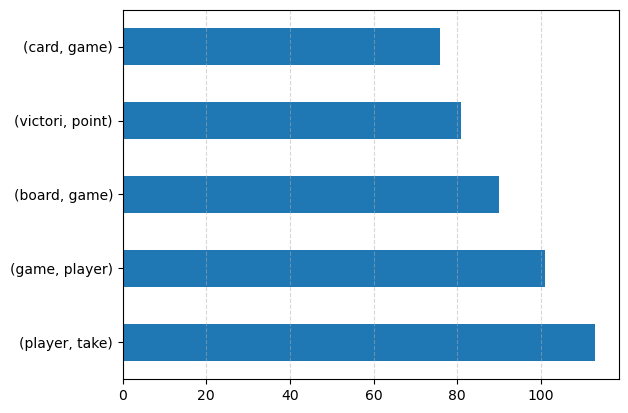

In [258]:
low_bigrams.plot.barh()
plt.grid(axis='x', alpha=.5, ls='--')

In [237]:
low_bigrams=pd.DataFrame(low_bigrams)

In [238]:
low_bigrams

,0
"(player, take)",113
"(game, player)",101
"(board, game)",90
"(victori, point)",81
"(card, game)",76


In [239]:
low_bigrams.rename(columns={0:'count'}, inplace=True)

In [240]:
low_bigrams=low_bigrams.reset_index()

In [241]:
low_bigrams.rename(columns={'index':'bigrams'}, inplace=True)

In [242]:
low_bigrams

,bigrams,count
0,"(player, take)",113
1,"(game, player)",101
2,"(board, game)",90
3,"(victori, point)",81
4,"(card, game)",76


In [319]:
def bigram_viz(dataset1, what_is_it):
    dataset1.plot.barh()
    plt.grid(axis='x', alpha=.5, ls='--')
    plt.title(what_is_it)
    plt.xlabel('Count')
    plt.ylabel('Bigrams')

In [320]:
low_bigram_viz=top_20_low_bigrams

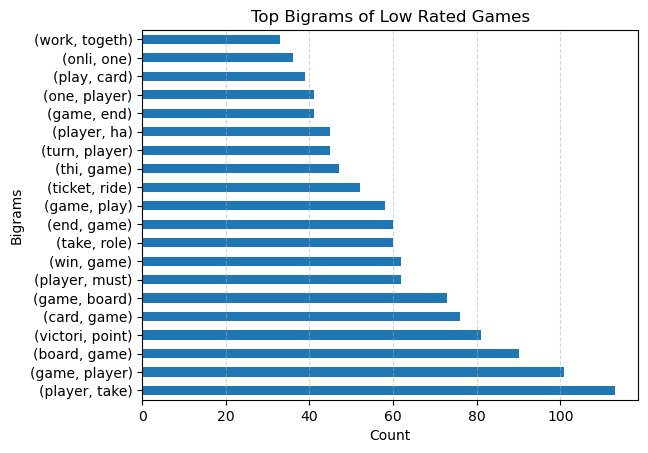

In [321]:
bigram_viz(low_bigram_viz, 'Top Bigrams of Low Rated Games')

In [355]:
def bigram_df(dataset1):
    bigram_df=pd.DataFrame(dataset1)
    bigram_df.rename(columns={0:'count'}, inplace=True)
    bigram_df=bigram_df.reset_index()
    bigram_df.rename(columns={'index':'bigrams'}, inplace=True)
    return bigram_df

In [356]:
bigram_df(low_bigram_viz)

,bigrams,count
0,"(player, take)",113
1,"(game, player)",101
2,"(board, game)",90
3,"(victori, point)",81
4,"(card, game)",76
5,"(game, board)",73
6,"(player, must)",62
7,"(win, game)",62
8,"(take, role)",60
9,"(end, game)",60


In [264]:
high_bigram_viz=top_20_high_bigrams

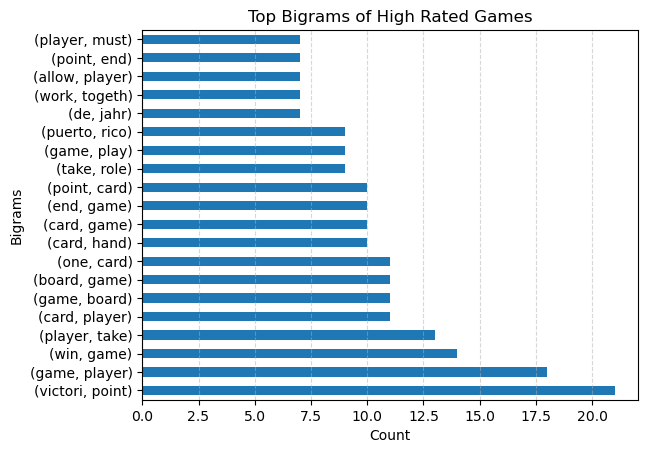

In [322]:
bigram_viz(high_bigram_viz, 'Top Bigrams of High Rated Games')

In [317]:
bigram_df(high_bigram_viz)

,bigrams,count
0,"(victori, point)",21
1,"(game, player)",18
2,"(win, game)",14
3,"(player, take)",13
4,"(card, player)",11
5,"(game, board)",11
6,"(board, game)",11
7,"(one, card)",11
8,"(card, hand)",10
9,"(card, game)",10


In [323]:
def trigram_viz(dataset1, what_is_it):
    dataset1
    dataset1.plot.barh()
    plt.grid(axis='x', alpha=.5, ls='--')
    plt.title(what_is_it)
    plt.xlabel('Count')
    plt.ylabel('Trigrams')

In [331]:
low_trigrams=top_20_low_trigrams

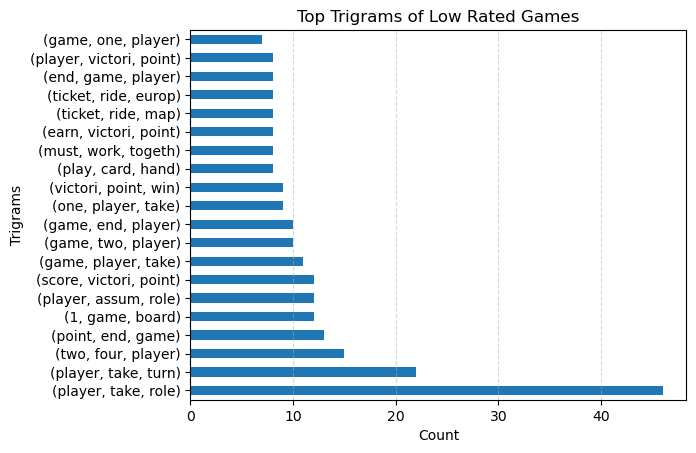

In [325]:
trigram_viz(low_trigrams, 'Top Trigrams of Low Rated Games')

In [357]:
def trigram_df(dataset1):
    trigram_df=pd.DataFrame(dataset1)
    trigram_df.rename(columns={0:'count'}, inplace=True)
    trigram_df=trigram_df.reset_index()
    trigram_df.rename(columns={'index':'trigrams'}, inplace=True)
    return trigram_df

In [358]:
trigram_df(low_trigrams)

,trigrams,count
0,"(player, take, role)",46
1,"(player, take, turn)",22
2,"(two, four, player)",15
3,"(point, end, game)",13
4,"(1, game, board)",12
5,"(player, assum, role)",12
6,"(score, victori, point)",12
7,"(game, player, take)",11
8,"(game, two, player)",10
9,"(game, end, player)",10


In [359]:
high_trigram=top_20_high_trigrams

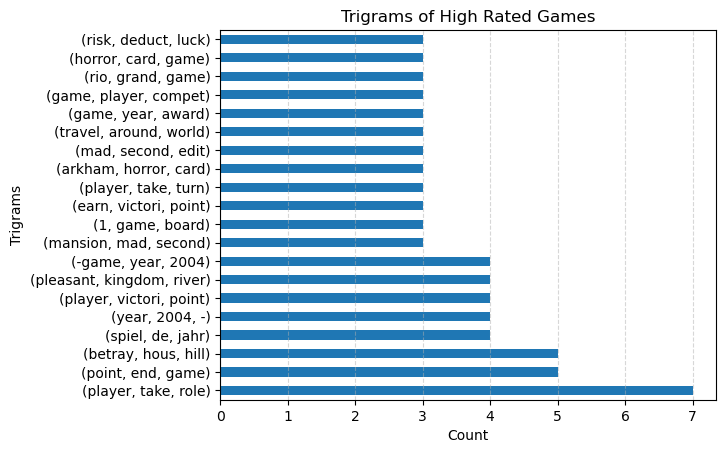

In [360]:
trigram_viz(high_trigram, 'Trigrams of High Rated Games')

In [361]:
trigram_df(high_trigram)

,trigrams,count
0,"(player, take, role)",7
1,"(point, end, game)",5
2,"(betray, hous, hill)",5
3,"(spiel, de, jahr)",4
4,"(year, 2004, -)",4
5,"(player, victori, point)",4
6,"(pleasant, kingdom, river)",4
7,"(-game, year, 2004)",4
8,"(mansion, mad, second)",3
9,"(1, game, board)",3


<div class="alert alert-info">
    <header>
    <h2>NLP Exploration Summary</h2>
    </header>
    <dl>
        <dt>In the bigrams, there is not a significant difference between high and low rated games. However in the trigrams, there are several that mention 'horror' in the higher rated games. Horror is a more adult genre which may imply the demographics of people that buy these games, but there was no significance in the minimum age between higher rated and lower rated games. My overall recommendation based on all the data would be to examine the aspects of the horror genre and incorperate those aspects. For example, horror includes elements of survival, escaping, beating a villian, teamwork, finding items/building an inventory, characters with different skills, etc. All these horror aspects can also relate to the top mechanics of higher rated games. There are also mentions of specific years both in German and English. No other data supports this being a high rated characteristic of a game, but is maybe an indication of having a specific setting versus a vague one.</dt>
    </dl>
</div>